In [67]:
# importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# To display maximum columns of dataframe on screen
pd.pandas.set_option('display.max_columns', None)

### 1.0 Importing dataset after filling missing values

In [68]:
dataset=pd.read_csv('Travel_missing_filled.csv')
dataset.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [69]:
# from EDA section getting continuous feature list
continuous_numerical_features=['Age', 'DurationOfPitch', 'MonthlyIncome']

### 2.0 Visualising outliers
1. using boxplot

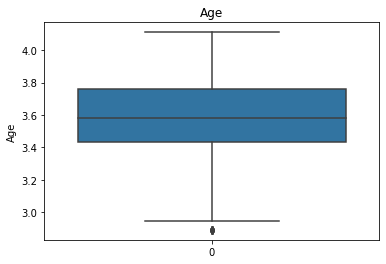

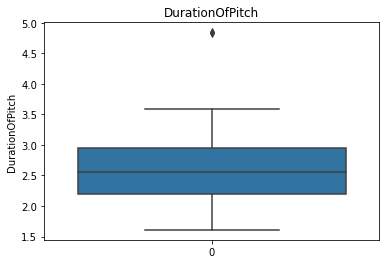

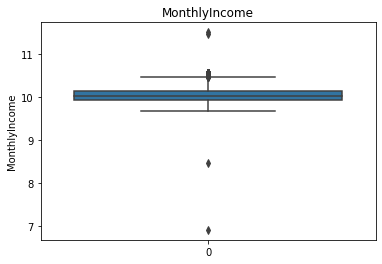

In [70]:
for feature in continuous_numerical_features:
    data1 = dataset.copy()
    # here we are ignoring all zero values,since log(0) is undefined
    if 0 in data1[feature].unique(): 
        pass
    else:
        data1[feature]=np.log(data1[feature])
        #data1.boxplot(column=feature)
        sns.boxplot(data=data1[feature])
        plt.ylabel(feature)
        plt.title(feature)
        plt.show();  

### 3.0 Handling outliers

### 3.1 Trimming outliers from the dataset
1. Trimming, or truncating, is the process of removing observations that show outliers in one or more variables in the dataset. There are three commonly used methods to set the boundaries beyond which a value can be considered an outlier. If the variable is normally distributed, the boundaries are given by the mean plus or minus three times the standard deviation, as approximately 99% of the data will be distributed between those limits. For normally, as well as not normally, distributed variables, we can determine the limits using the inter-quartile range proximity rules or by directly setting the limits to the 5th and 95th quantiles.

In [71]:
### function to find the boundaries of a variable distribution, using the inter-quartile range proximity rule.

def boundries_dist(in_data, in_feature):
    IQR=(in_data[feature].quantile(0.75))-(in_data[feature].quantile(0.25))
    lower_bound=in_data[feature].quantile(0.25)-(1.5*IQR)
    upper_bound=in_data[feature].quantile(0.75)+(1.5*IQR)
    return lower_bound, upper_bound


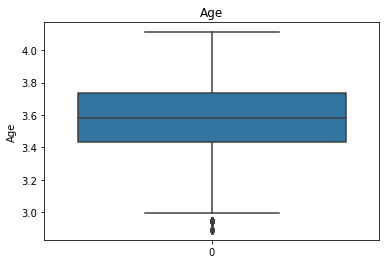

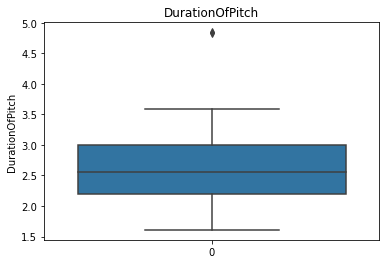

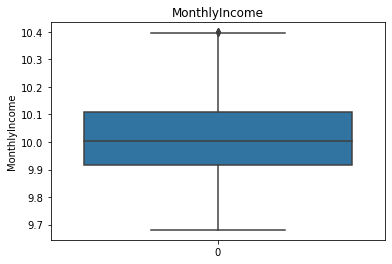

In [72]:
data1=dataset.copy()

for feature in continuous_numerical_features:
    lower_boundary, upper_boundary=boundries_dist(data1, feature)
    outliers=np.where(data1[feature] >= upper_boundary, True,np.where(data1[feature] <= lower_boundary, True,False))
    data_trimmed=data1.loc[~(outliers)]

for feature in continuous_numerical_features:
    # here we are ignoring all zero values,since log(0) is undefined
    if 0 in data_trimmed[feature].unique(): 
        pass
    else:
        data_trimmed[feature]=np.log(data_trimmed[feature])
        #data1.boxplot(column=feature)
        sns.boxplot(data=data_trimmed[feature])
        plt.ylabel(feature)
        plt.title(feature)
        plt.show();     

In [73]:
# it is clearly visible that outliers are removed
data_trimmed.shape

(4513, 20)

### 3.2 winsorization
1. Winsorization, or winsorizing, is the process of transforming the data by limiting the extreme values, that is, the outliers, to a certain arbitrary value, closer to the mean of the distribution. Winsorizing is different from trimming because the extreme values are not removed, but are instead replaced by other values. A typical strategy involves setting outliers to a specified percentile

In [74]:
# function to winsorize a variable to arbitrary upper and lower limits

def winsorize(in_data, in_feature, limits):
    s= in_data[feature]
    return s.clip(lower=s.quantile(limits[0], interpolation='lower'), 
                  upper=s.quantile(1-limits[1], interpolation='higher'))

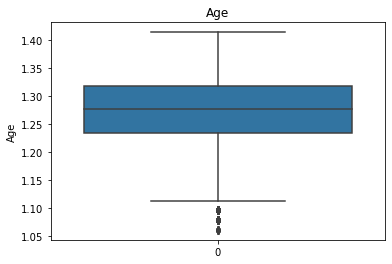

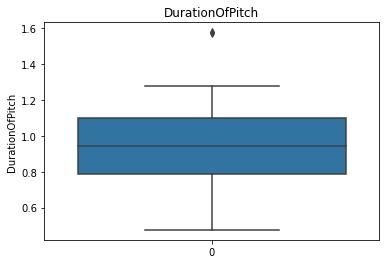

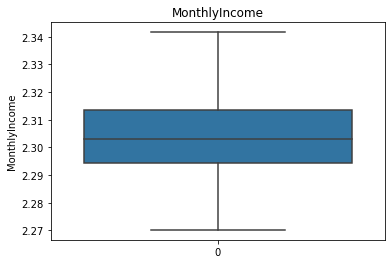

In [75]:
data1=dataset.copy()

for feature in continuous_numerical_features:
    data1[feature]= winsorize(data1, feature, (0.95, 0.05))
    
for feature in continuous_numerical_features:
    # here we are ignoring all zero values,since log(0) is undefined
    if 0 in data_trimmed[feature].unique(): 
        pass
    else:
        data_trimmed[feature]=np.log(data_trimmed[feature])
        #data1.boxplot(column=feature)
        sns.boxplot(data=data_trimmed[feature])
        plt.ylabel(feature)
        plt.title(feature)
        plt.show();     